In [2]:
import os
import json


import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms

import torchvision
from torch.utils.data import DataLoader, Dataset
from torchvision.io import ImageReadMode, read_image

from icecream import ic

In [4]:
root_path = os.path.dirname(os.getcwd())
img_path = f"{root_path}/images"

In [5]:
TRAIN_PERCENTAGE = 0.7
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 5

In [6]:
data: dict
with open(f"{img_path}/images.json") as f:
    data = json.load(f)

data.keys()

dict_keys(['IMG_1448.jpeg', 'IMG_1409.jpeg', 'IMG_1425.jpeg', 'IMG_1560.jpeg', 'IMG_1472.jpeg', 'IMG_1537.jpeg', 'IMG_1464.jpeg', 'IMG_1521.jpeg', 'IMG_1433.jpeg', 'IMG_1599.jpeg', 'IMG_1576.jpeg', 'IMG_1501.jpeg', 'IMG_1444.jpeg', 'IMG_1556.jpeg', 'IMG_1413.jpeg', 'IMG_1540.jpeg', 'IMG_1405.jpeg', 'IMG_1517.jpeg', 'IMG_1452.jpeg', 'IMG_1429.jpeg', 'IMG_1583.jpeg', 'IMG_1491.jpeg', 'IMG_1468.jpeg', 'IMG_1487.jpeg', 'IMG_1595.jpeg', 'IMG_1594.jpeg', 'IMG_1469.jpeg', 'IMG_1486.jpeg', 'IMG_1490.jpeg', 'IMG_1428.jpeg', 'IMG_1582.jpeg', 'IMG_1516.jpeg', 'IMG_1453.jpeg', 'IMG_1541.jpeg', 'IMG_1404.jpeg', 'IMG_1557.jpeg', 'IMG_1412.jpeg', 'IMG_1500.jpeg', 'IMG_1445.jpeg', 'IMG_1432.jpeg', 'IMG_1598.jpeg', 'IMG_1577.jpeg', 'IMG_1465.jpeg', 'IMG_1520.jpeg', 'IMG_1473.jpeg', 'IMG_1536.jpeg', 'IMG_1424.jpeg', 'IMG_1561.jpeg', 'IMG_1408.jpeg', 'IMG_1449.jpeg', 'IMG_1507.jpeg', 'IMG_1442.jpeg', 'IMG_1550.jpeg', 'IMG_1415.jpeg', 'IMG_1546.jpeg', 'IMG_1403.jpeg', 'IMG_1511.jpeg', 'IMG_1454.jpeg', 'IM

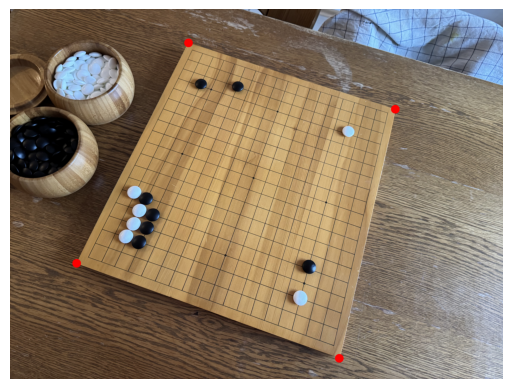

In [7]:
selected_image = list(data.keys())[0]
example_img = f"{img_path}/raw/{selected_image}"

image = cv2.imread(example_img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

corners = data[selected_image]["corners"]
height, width, _ = image.shape

for x, y in corners:
    image = cv2.circle(image, (int(width * x), int(height * y)), 50, (255, 0, 0), -1)


plt.imshow(image)
plt.axis("off")
plt.show()